# step 1 business problem understanding
predict admission based on score


# step 2 data understanding


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("admission_predict.csv")

In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# step 3 exploratory data analysis

In [18]:
df.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [20]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

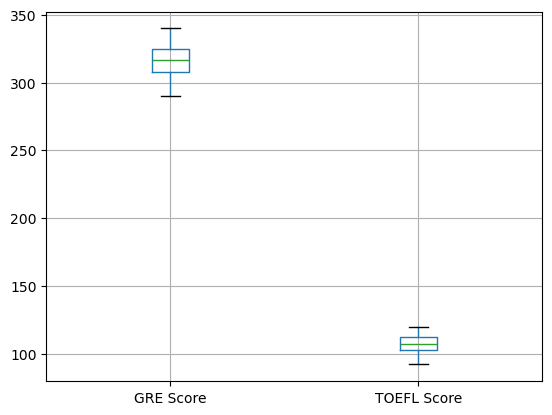

In [22]:
df.boxplot(column = ["GRE Score","TOEFL Score"])
plt.show()

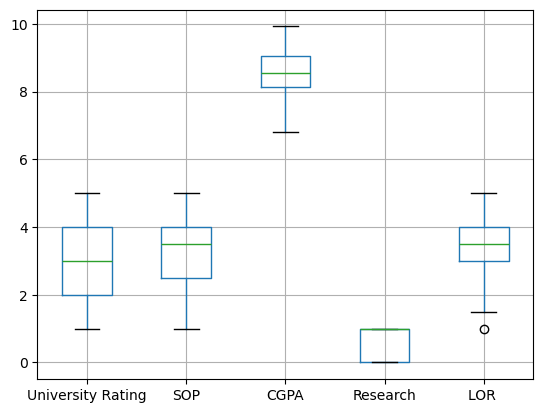

In [24]:
df.boxplot(column=["University Rating", "SOP", "CGPA", "Research","LOR "])
plt.show()

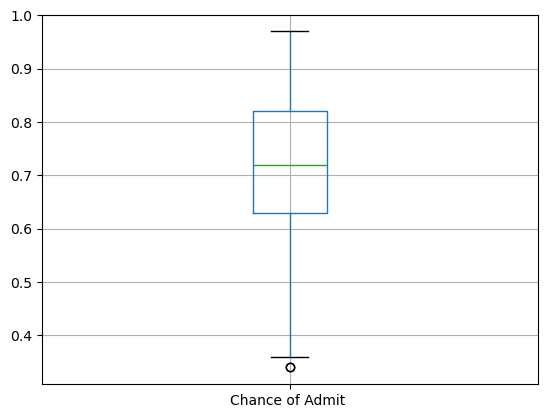

In [26]:
df.boxplot(column=["Chance of Admit "])
plt.show() 

In [28]:
df1 = df.copy()
df1.drop(["Serial No."],axis=1,inplace=True)

In [114]:
# Calculate the first quartile (Q1)
Q1 = df1.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df1.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the IQR for each column
print("Interquartile Range (IQR):\n")
print(IQR)

Interquartile Range (IQR):

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [116]:
# Identify outliers based on the Interquartile Range (IQR) method
df_out1 = df1[
    (
        (df1 < (Q1 - 1.5 * IQR)) |  # Values less than Q1 - 1.5 * IQR
        (df1 > (Q3 + 1.5 * IQR))    # Values greater than Q3 + 1.5 * IQR
    ).any(axis=1)  # Apply condition row-wise
]

# Display the first 5 rows of the resulting dataframe
df_out1.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


In [118]:
# Filter out outliers based on the IQR method
df_out1 = df1[
    ~(
        (df1 < (Q1 - 1.5 * IQR)) |  # Exclude values less than Q1 - 1.5 * IQR
        (df1 > (Q3 + 1.5 * IQR))    # Exclude values greater than Q3 + 1.5 * IQR
    ).any(axis=1)  # Apply condition row-wise
]

# Create a copy of the filtered DataFrame
df = df_out1.copy()

# Print the shape of the cleaned DataFrame (number of rows and columns)
print(df.shape)


(497, 8)


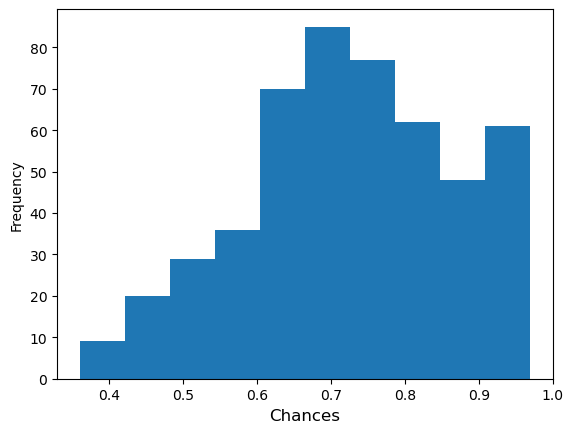

In [120]:
# Univariate analysis: Plotting the histogram of "Chance of Admit" column
df["Chance of Admit "].plot.hist()

# Adding label to the x-axis
plt.xlabel("Chances", fontsize=12)

# Display the plot
plt.show()


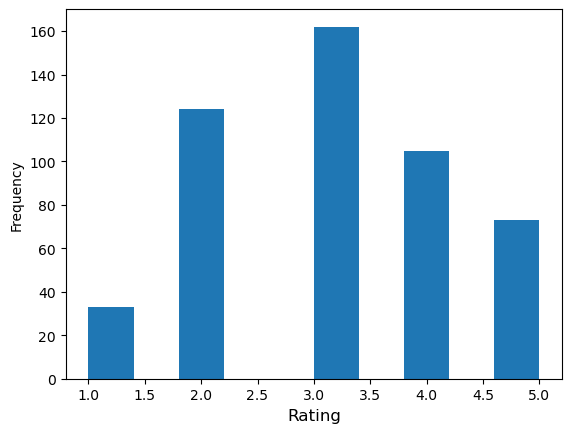

In [122]:
# Univariate analysis: Plotting the histogram of "University Rating" column
df["University Rating"].plot.hist()

# Adding label to the x-axis
plt.xlabel("Rating", fontsize=12)

# Display the plot
plt.show()


In [40]:
df["Research"].value_counts()

Research
1    280
0    217
Name: count, dtype: int64

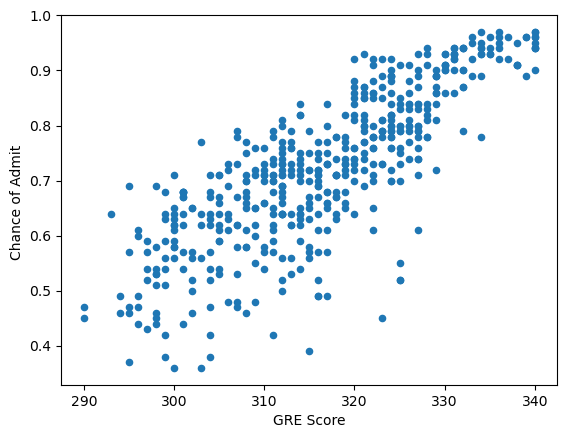

In [124]:
# Bivariate analysis: Scatter plot of "GRE Score" vs. "Chance of Admit"
df.plot.scatter(x="GRE Score", y="Chance of Admit ")

# Display the plot
plt.show()


In [126]:
# Calculate the correlation between "GRE Score" and "Chance of Admit"
correlation = df["GRE Score"].corr(df["Chance of Admit "])

# Display the correlation coefficient
correlation


0.8075935865869602

In [46]:
df["TOEFL Score"].corr(df["Chance of Admit "])

0.7881282679383226

In [48]:
df["CGPA"].corr(df["Chance of Admit "])

0.8831214773197417

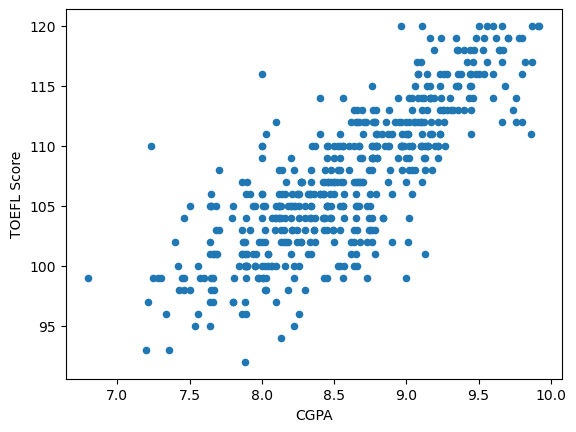

In [128]:
# Bivariate analysis: Scatter plot of "CGPA" vs. "TOEFL Score"
df.plot.scatter(x="CGPA", y="TOEFL Score")

# Display the plot
plt.show()


In [52]:
df["CGPA"].corr(df["TOEFL Score"])

0.807281704840357

In [54]:
df["CGPA"].corr(df["GRE Score"])

0.8237387287388344

# step 4 ML model

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

# Assuming your data is in a DataFrame named 'df'
X = df.drop('Chance of Admit ', axis=1)  # Features
y = df['Chance of Admit ']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Linear Regression model
lr = LR()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [130]:
# Prediction on the training data
train_predict = lr.predict(X_train_scaled)

# Calculate the Mean Absolute Error (MAE) for the training data
k = mae(train_predict, y_train)

# Display the MAE result for the training data
print("Training Mean Absolute Error (MAE):", k)


Training Mean Absolute Error (MAE): 0.04020620426110526


In [132]:
# Prediction on the test data
test_predict = lr.predict(X_test_scaled)

# Calculate the Mean Absolute Error (MAE) for the test data
k = mae(test_predict, y_test)

# Display the MAE result for the test data
print("Test Mean Absolute Error (MAE):", k)


Test Mean Absolute Error (MAE): 0.04745284744731624


# step 5 model evaluation

In [84]:
from sklearn.metrics import mean_squared_error

In [134]:
# Prediction on the training data
pred_train = lr.predict(X_train_scaled)

# Calculate the Root Mean Squared Error (RMSE) for the training data
train_score = np.sqrt(mean_squared_error(y_train, pred_train))

# Display the RMSE result for the training data
print("Training Root Mean Squared Error (RMSE):", train_score)


Training Root Mean Squared Error (RMSE): 0.05693482863625665


In [136]:
# Prediction on the test data
pred_test = lr.predict(X_test_scaled)

# Calculate the Root Mean Squared Error (RMSE) for the test data
test_score = np.sqrt(mean_squared_error(y_test, pred_test))

# Display the RMSE result for the test data
print("Test Root Mean Squared Error (RMSE):", test_score)


Test Root Mean Squared Error (RMSE): 0.06481550718676804


In [100]:
print ("Training Score",train_score)
print ("validation Score",test_score)

Training Score 0.05693482863625665
validation Score 0.06481550718676804


In [138]:
# Calculate the accuracy of the model on the test and training data
test_accuracy = lr.score(X_test_scaled, y_test) * 100
train_accuracy = lr.score(X_train_scaled, y_train) * 100

# Display the accuracy results
print("Accuracy on Training Set: {:.2f}%".format(train_accuracy))
print("Accuracy on Test Set: {:.2f}%".format(test_accuracy))


Accuracy on Training Set: 83.05%
Accuracy on Test Set: 77.44%
